# Data Analysis and Prediction on Titanic dataset

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

installing sklearn library

In [2]:
!pip install sklearn

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

Loading dataset "titanic.csv"

In [4]:
data= pd.read_csv("titanic.csv")

viewing data in the dataset for preprocessing

In [5]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
#data=sns.load_dataset("titanic")

In [7]:
data.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

Duplicate columns/ features should be removed to eliminate redundancies

In [8]:
du_col=["survived","pclass","sex","adult_male","deck","embark_town","alone"]

In [9]:
data.drop(du_col, axis=1, inplace=True)

In [10]:
data

,age,sibsp,parch,fare,embarked,class,who,alive
0,22.0,1,0,7.2500,S,Third,man,no
1,38.0,1,0,71.2833,C,First,woman,yes
2,26.0,0,0,7.9250,S,Third,woman,yes
3,35.0,1,0,53.1000,S,First,woman,yes
4,35.0,0,0,8.0500,S,Third,man,no
...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,S,Second,man,no
887,19.0,0,0,30.0000,S,First,woman,yes
888,NaN,1,2,23.4500,S,Third,woman,no
889,26.0,0,0,30.0000,C,First,man,yes


grouping data with respect to class and according to their mean values

In [11]:
data.groupby(by="class",axis=0).mean()

,age,sibsp,parch,fare
class,,,,
First,38.233441,0.416667,0.356481,84.154687
Second,29.877630,0.402174,0.380435,20.662183
Third,25.140620,0.615071,0.393075,13.675550


Displaying pivot table 

In [12]:
data.pivot_table(index=["class"],columns=["who", "embarked"], values=["age","fare"], aggfunc={"age": np.sum, "fare": np.mean},fill_value=0)

age                                                        \
who        child                 man              woman                  
embarked       C   Q       S       C    Q       S     C      Q       S   
class                                                                    
First       0.00   0   46.92  1444.0   44  2665.5  1370   33.0  1408.0   
Second     18.00   0   68.33   206.5   57  2759.5   117   30.0  1912.5   
Third     130.42  36  229.00   587.0  373  5564.0   133  213.5  1659.0   

               fare                                                         \
who           child                              man                         
embarked          C         Q           S          C          Q          S   
class                                                                        
First      0.000000   0.00000  139.382633  93.536707  90.000000  50.389967   
Second    36.218067   0.00000   26.843750  24.134256  12.350000  18.615730   
Third     13.503900  24.90584   26.833771   9.137721   9.958451  11.888209   

                                            
who            woman                        
embarked           C          Q          S  
class                                       
First     115.640309  90.000000  94.897871  
Second     21.045840  12.350000  21.142373  
Third      15.099992  10.379041  17.672383

We should take care of the null/nan values for proper data analysis process. Here, sum() function displays the sum of all the NaN values in the feature.

In [13]:
data.isna().sum()

age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alive         0
dtype: int64

Here we can see the features age and embarked has NaN values, so we can replace them with zeros if it doesnot effect much in the data analysis process, we can also replace them with their mean values, and so on. Here, the NaN are filled with random normal distributed values with mean as mean of age and standard deviation 8.

In [14]:
mean_age=data["age"].mean()
std_age=8

In [15]:
fill= np.random.normal(mean_age,std_age,size=177)

In [16]:
def get_random_age():
    return float(np.random.choice(fill))
    

In [17]:
data["age"].fillna(get_random_age())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    28.307696
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [18]:
data["age"]= data["age"].fillna(get_random_age())

In [19]:
data["age"].isna().sum()

0

Here, we can see there is zero NaN values in age.

In [20]:
data.isna().sum()

age         0
sibsp       0
parch       0
fare        0
embarked    2
class       0
who         0
alive       0
dtype: int64

In [21]:
data.head()

,age,sibsp,parch,fare,embarked,class,who,alive
0,22.0,1,0,7.2500,S,Third,man,no
1,38.0,1,0,71.2833,C,First,woman,yes
2,26.0,0,0,7.9250,S,Third,woman,yes
3,35.0,1,0,53.1000,S,First,woman,yes
4,35.0,0,0,8.0500,S,Third,man,no


In [22]:
data["embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [23]:
data["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

since, embarked has only 2 missing values, and value "S" has high counts, 
it can also be replaced by "S".

In [24]:
data["embarked"]= data["embarked"].fillna("S")

In [25]:
data["embarked"].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [26]:
data["embarked"].isna().sum()

0

Now, Lets plot the features with Kernel density estimate plot between age and alive.

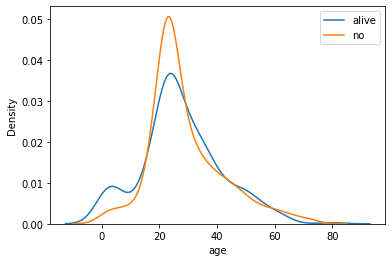

In [27]:
sns.kdeplot(data[data["alive"]=="yes"]["age"],label="alive")
sns.kdeplot(data[data["alive"]=="no"]["age"], label="no")
plt.legend(["alive","no"], loc="upper right")
plt.show()

Here, we can see the people from 20 to 30 has highest mortality rate, also high alive rate.

In [28]:
data["age_group"]= pd.cut(data["age"], [0,18,50,65,80])

A new feature age group was created to store the ages in 4 groups.

In [29]:
data["age_group"]

0      (18, 50]
1      (18, 50]
2      (18, 50]
3      (18, 50]
4      (18, 50]
         ...   
886    (18, 50]
887    (18, 50]
888    (18, 50]
889    (18, 50]
890    (18, 50]
Name: age_group, Length: 891, dtype: category
Categories (4, interval[int64]): [(0, 18] < (18, 50] < (50, 65] < (65, 80]]

# Data Visualization

C:\Users\Dpka\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_group', ylabel='count'>

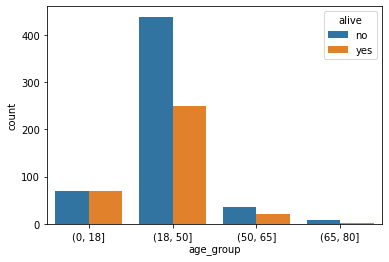

In [30]:
sns.countplot("age_group",data=data, hue="alive")

Age group 18-50 has high mortality as well as alive rate.

In [31]:
data.columns

Index(['age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'alive',
       'age_group'],
      dtype='object')

In [32]:
data["family"]=data["parch"]+data["sibsp"]

Now, new group "family" is created to merge the data of parch and sibsp.

C:\Users\Dpka\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


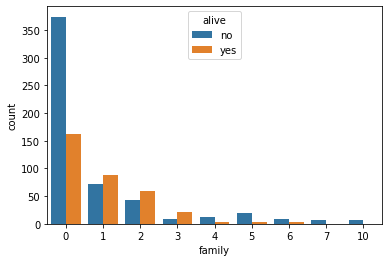

In [33]:
sns.countplot("family", data=data, hue="alive")
plt.show()

We can see that passengers coming alone without family has high mortality rate. 

C:\Users\Dpka\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


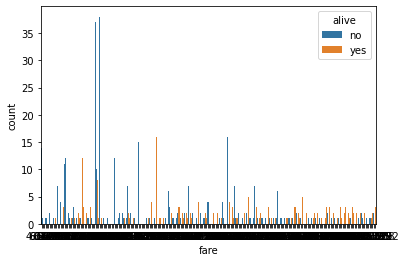

In [34]:
sns.countplot("fare", data=data, hue="alive")
plt.show()

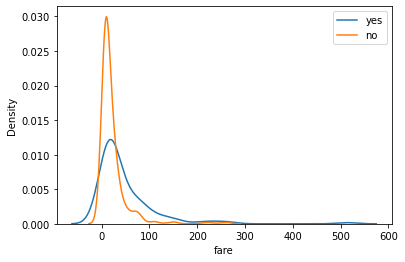

In [35]:
sns.kdeplot(data[data["alive"]=="yes"]["fare"],label="yes")
sns.kdeplot(data[data["alive"]=="no"]["fare"],label="no")
plt.legend(["yes","no"], loc="upper right")
plt.show()

This shows that passengers who paid lower fare has high mortality rate. 

C:\Users\Dpka\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


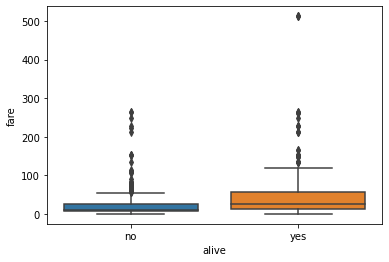

In [36]:
sns.boxplot("alive","fare",data=data)
plt.show()

the above box plot shows the outliers in the data and we can see that there are some who paid fare above 500 and are alive.

C:\Users\Dpka\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


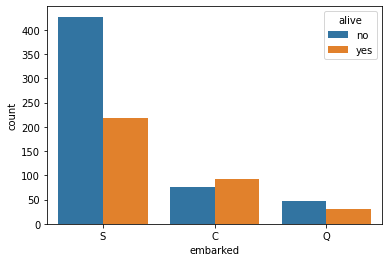

In [37]:
sns.countplot("embarked", data=data, hue="alive")
plt.show()

This shows that passengers who were from "S" town has high mortality rate as well as high alive rate as compared to other towns.

In [38]:
data.columns

Index(['age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'alive',
       'age_group', 'family'],
      dtype='object')

C:\Users\Dpka\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


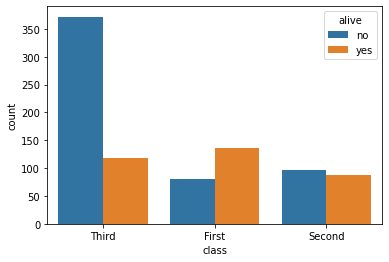

In [39]:
sns.countplot("class", data=data, hue="alive")
plt.show()

C:\Users\Dpka\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


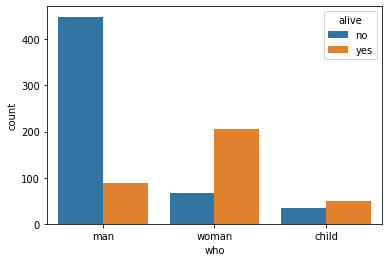

In [40]:
sns.countplot("who", data=data, hue="alive")
plt.show()

In [41]:
data.drop("sibsp", axis=1,inplace=True)

In [42]:
data.drop("parch", axis=1,inplace=True)

In [43]:
data.drop("age_group", axis=1,inplace=True)

In [44]:
data

,age,fare,embarked,class,who,alive,family
0,22.000000,7.2500,S,Third,man,no,1
1,38.000000,71.2833,C,First,woman,yes,1
2,26.000000,7.9250,S,Third,woman,yes,0
3,35.000000,53.1000,S,First,woman,yes,1
4,35.000000,8.0500,S,Third,man,no,0
...,...,...,...,...,...,...,...
886,27.000000,13.0000,S,Second,man,no,0
887,19.000000,30.0000,S,First,woman,yes,0
888,23.171442,23.4500,S,Third,woman,no,3
889,26.000000,30.0000,C,First,man,yes,0


In [45]:
data.dtypes

age         float64
fare        float64
embarked     object
class        object
who          object
alive        object
family        int64
dtype: object

then, scalling should be done to standardize the independent features present in the data in a fixed range.

In [46]:
from sklearn.preprocessing import RobustScaler

In [47]:
num_cols=["age","fare","family"]
scaler=RobustScaler()

scaler.fit(data[num_cols])
Scaled= scaler.transform(data[num_cols])

In [48]:
mapping={
    "S":0,
    "C":1,
    "Q":2
}

data["embarked"]=data["embarked"].map(mapping)

Here, map is used for encoding process, mapping is a dictionary that has numeric values for each town, to convert the strings to numeric values for processing.

In [49]:
data

,age,fare,embarked,class,who,alive,family
0,22.000000,7.2500,0,Third,man,no,1
1,38.000000,71.2833,1,First,woman,yes,1
2,26.000000,7.9250,0,Third,woman,yes,0
3,35.000000,53.1000,0,First,woman,yes,1
4,35.000000,8.0500,0,Third,man,no,0
...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,Second,man,no,0
887,19.000000,30.0000,0,First,woman,yes,0
888,23.171442,23.4500,0,Third,woman,no,3
889,26.000000,30.0000,1,First,man,yes,0


In [50]:
mapping={
    "First":0,
    "Second":1,
    "Third":2
}

data["class"]=data["class"].map(mapping)

In [51]:
data

,age,fare,embarked,class,who,alive,family
0,22.000000,7.2500,0,2,man,no,1
1,38.000000,71.2833,1,0,woman,yes,1
2,26.000000,7.9250,0,2,woman,yes,0
3,35.000000,53.1000,0,0,woman,yes,1
4,35.000000,8.0500,0,2,man,no,0
...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,man,no,0
887,19.000000,30.0000,0,0,woman,yes,0
888,23.171442,23.4500,0,2,woman,no,3
889,26.000000,30.0000,1,0,man,yes,0


In [52]:
data["who"].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [53]:
#data["class"]=data["class"].astype("object")

In [54]:
#data.dtypes

In [55]:
#data["who"]=data["who"].astype("category")

Encoding the feature "who" using for loop

In [56]:
for i in range (0,891):
    if data["who"][i]=="man":
        data["who"][i]=0
    elif data["who"][i]=="woman":
        data["who"][i]=1
    elif data["who"][i]=="child":
        data["who"][i]=2
    

<ipython-input-56-ae853433ef4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["who"][i]=0
<ipython-input-56-ae853433ef4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["who"][i]=1
<ipython-input-56-ae853433ef4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["who"][i]=2


In [57]:
data.head()

,age,fare,embarked,class,who,alive,family
0,22.0,7.2500,0,2,0,no,1
1,38.0,71.2833,1,0,1,yes,1
2,26.0,7.9250,0,2,1,yes,0
3,35.0,53.1000,0,0,1,yes,1
4,35.0,8.0500,0,2,0,no,0


Spliting Data into train and test set

In [58]:
X=data.drop("alive", axis=1)
y=data["alive"]

In [59]:
X.shape

(891, 6)

In [60]:
y.shape

(891,)


# Data Prediction

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logistic= LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
y_pred=logistic.predict(X_test)

In [67]:
a=np.asarray([22.0,7.2500,0,2,0,1])

In [68]:
logistic.predict(a.reshape(1,-1))

array(['no'], dtype=object)

In [69]:
accuracy_score(y_test,y_pred)

0.776536312849162

In [70]:
cm=confusion_matrix(y_pred,y_test)

In [71]:
cm

array([[104,  26],
       [ 14,  35]], dtype=int64)

In [72]:
importance=logistic.coef_[0]
importance.shape

(6,)

In [73]:
for i,v in enumerate(importance):
    print("feature %d,Score %f" %(i,v))

feature 0,Score 0.006856
feature 1,Score 0.005345
feature 2,Score 0.304115
feature 3,Score -0.912855
feature 4,Score 2.486634
feature 5,Score -0.497765


Now using Random Forest CLassifier to extract important features 

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
random=RandomForestClassifier(n_estimators=100,criterion="gini",max_depth=5,random_state=0)
random.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [82]:
#y_pred=random.predict(X_test)

In [83]:
#accuracy_score(y_pred, y_test)

In [84]:
random.feature_importances_

array([0.0423383 , 0.70518448, 0.25247722])

In [85]:
final=["fare","who"]

In [86]:
A=data[final]
b=data["alive"]

In [87]:
A_train,A_test,b_train,b_test=train_test_split(A,b,test_size=0.2)

In [88]:
log=LogisticRegression()
log.fit(A_train,b_train)

LogisticRegression()

In [89]:
y_pred=log.predict(A_test)

In [90]:
accuracy_score(y_pred,b_test)

0.7206703910614525